## Import the needed libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("train.csv")
data = train.append(test)
data = data[["LotArea", "OverallQual", "OverallCond", "TotalBsmtSF", "1stFlrSF", "FullBath",
             "BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "SalePrice"]]

## Exploring the data

In [3]:
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice
0,8450,7,5,856,856,2,3,8,0,2,548,208500
1,9600,6,8,1262,1262,2,3,6,1,2,460,181500
2,11250,7,5,920,920,2,3,6,1,2,608,223500
3,9550,7,5,756,961,1,3,7,1,3,642,140000
4,14260,8,5,1145,1145,2,4,9,1,3,836,250000


Lets plot a histogram of the target variable, 'Sale Price'

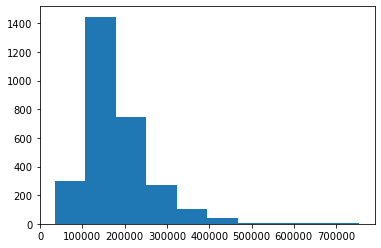

In [4]:
plt.hist(data["SalePrice"])
plt.show()

The target variable is right-skewed

Let's look at the relationships of the variables and our target variable in a heat map

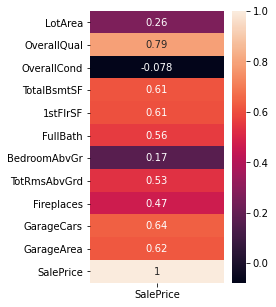

In [5]:
salePrice_corr = data.corr()[["SalePrice"]]
plt.figure(figsize = (3,5))
sns.heatmap(salePrice_corr, annot=True)
plt.show()

Let's examine these relationships by using scatterplots

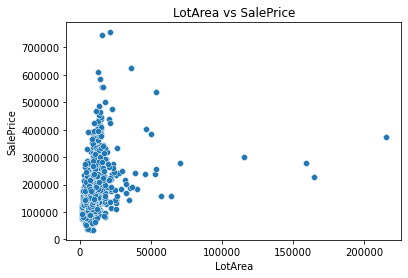

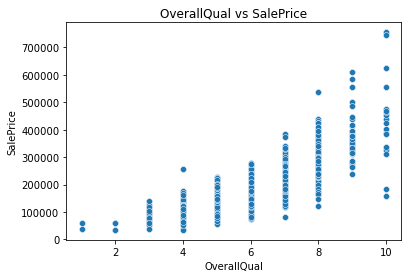

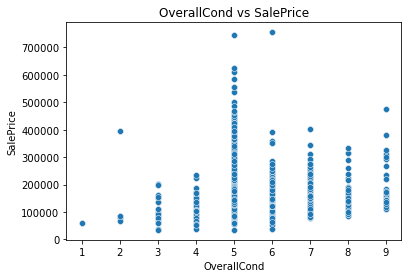

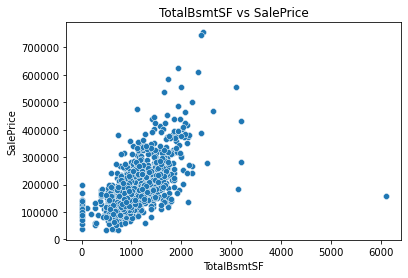

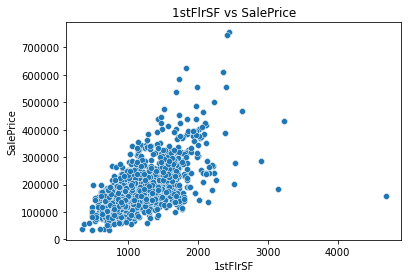

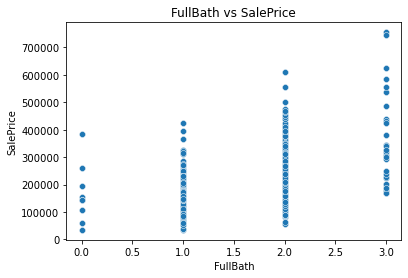

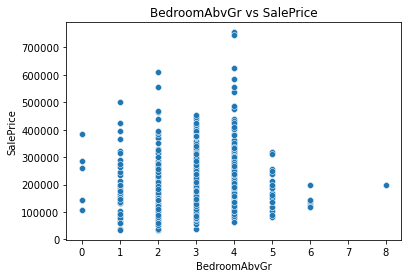

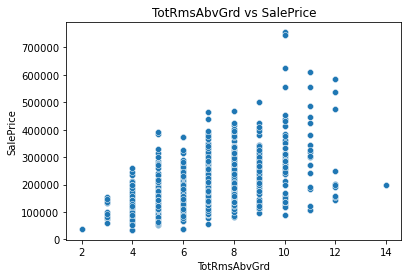

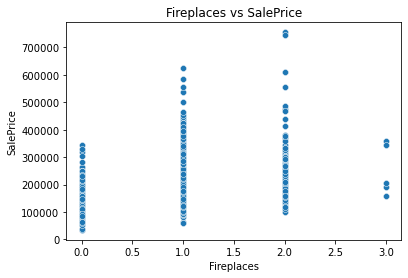

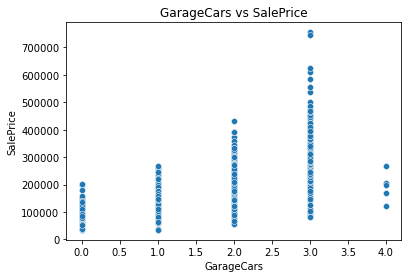

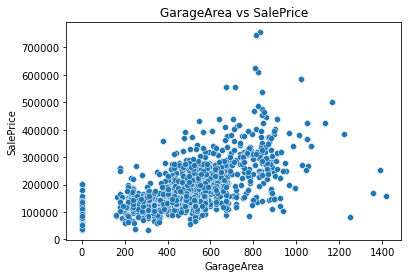

In [6]:
for i in range(len(data.columns)-1):
    sns.scatterplot(x=data.columns[i], y="SalePrice", data=data)
    plt.xlabel(data.columns[i])
    plt.ylabel(data.columns[-1])
    plt.title(f"{data.columns[i]} vs {data.columns[-1]}")
    plt.show()

From the above scatterplots, 'OverallQual' has the strongest linear relationship which also had the strongest correlationship on the heatmap

## Data Preprocessing

### Check for null values

In [7]:
data.isna().sum().sum()

0

### Scaling the Data

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## Data Modeling

We will get the X and y values of the data and then split them into training and testing sets.

In [9]:
X = scaled_data[:,:-1]
y = scaled_data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### Random Forest Model

In [10]:
regressor_rf = RandomForestRegressor().fit(X_train, y_train)
pred_rf = regressor_rf.predict(X_test)

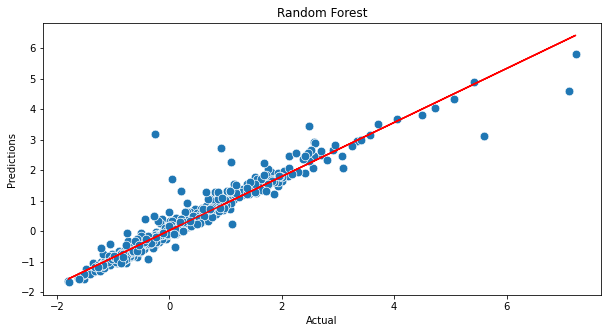

In [11]:
m, b = np.polyfit(y_test, pred_rf, 1)

plt.figure(figsize = (10,5))
sns.scatterplot(x=y_test, y=pred_rf, s=75)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Random Forest")
plt.plot(y_test, m*y_test + b, color="red")
plt.show()


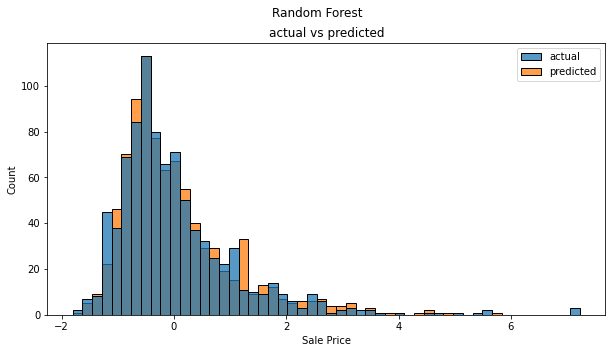

In [12]:
df_rf = pd.DataFrame({"actual":y_test, "predicted":pred_rf})

plt.figure(figsize = (10,5))
sns.histplot(df_rf)
plt.suptitle("Random Forest")
plt.title("actual vs predicted")
plt.xlabel("Sale Price")
plt.show()

In [13]:
explained_variance = metrics.explained_variance_score(y_test, pred_rf)
max_error = metrics.max_error(y_test, pred_rf)
mean_abs_error = metrics.mean_absolute_error(y_test, pred_rf)
mean_sq_error = metrics.mean_squared_error(y_test, pred_rf)
med_abs_error = metrics.median_absolute_error(y_test, pred_rf)
r2 = metrics.r2_score(y_test, pred_rf)

metrics_dict = {"metric":["explained_variance", "max_error", "mean_abs_error",
                          "mean_sq_error", "med_abs_error", "R2"], 
                "score":["{:.3f}".format(explained_variance), "{:.3f}".format(max_error),
                         "{:.3f}".format(mean_abs_error), "{:.3f}".format(mean_sq_error),
                         "{:.3f}".format(med_abs_error), "{:.3f}".format(r2)]}

metrics_rf = pd.DataFrame(metrics_dict)

metrics_rf


,metric,score
0,explained_variance,0.906
1,max_error,3.450
2,mean_abs_error,0.162
3,mean_sq_error,0.115
4,med_abs_error,0.083
5,R2,0.905


### Variable Importance Plot

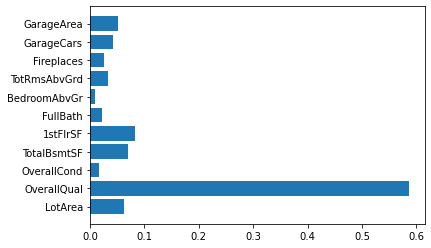

In [14]:
plt.barh(data.columns[0:-1], regressor_rf.feature_importances_)
plt.show()

From the variable importance plot, we can see that the model highly uses the "OverallQual" variable to make predictions.

### Decision Tree Model

In [15]:
regressor_tree = DecisionTreeRegressor().fit(X_train, y_train)
pred_tree = regressor_tree.predict(X_test)

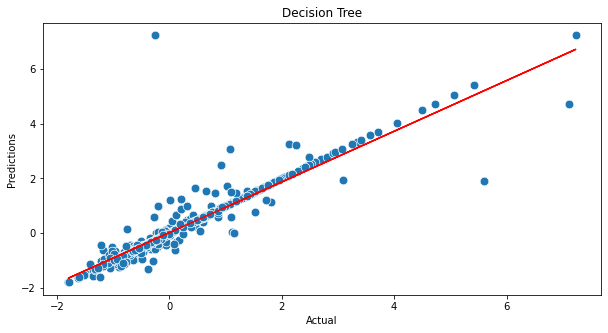

In [16]:
m, b = np.polyfit(y_test, pred_tree, 1)

plt.figure(figsize = (10,5))
sns.scatterplot(x=y_test, y=pred_tree, s=75)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Decision Tree")
plt.plot(y_test, m*y_test + b, color="red")
plt.show()

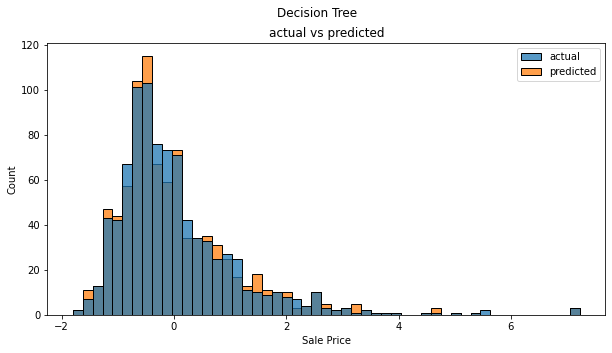

In [17]:
df_tree = pd.DataFrame({"actual":y_test, "predicted":pred_tree})

plt.figure(figsize = (10,5))
sns.histplot(df_tree)
plt.suptitle("Decision Tree")
plt.title("actual vs predicted")
plt.xlabel("Sale Price")
plt.show()

In [18]:
explained_variance = metrics.explained_variance_score(y_test, pred_tree)
max_error = metrics.max_error(y_test, pred_tree)
mean_abs_error = metrics.mean_absolute_error(y_test, pred_tree)
mean_sq_error = metrics.mean_squared_error(y_test, pred_tree)
med_abs_error = metrics.median_absolute_error(y_test, pred_tree)
r2 = metrics.r2_score(y_test, pred_tree)

metrics_dict = {"metric":["explained_variance", "max_error", "mean_abs_error",
                          "mean_sq_error", "med_abs_error", "R2"],
                "score":["{:.5f}".format(explained_variance), "{:.5f}".format(max_error),
                         "{:.5f}".format(mean_abs_error), "{:.5f}".format(mean_sq_error),
                         "{:.5f}".format(med_abs_error), "{:.5f}".format(r2)]}

metrics_tree = pd.DataFrame(metrics_dict)

metrics_tree

,metric,score
0,explained_variance,0.79790
1,max_error,7.49226
2,mean_abs_error,0.13467
3,mean_sq_error,0.24568
4,med_abs_error,0.00000
5,R2,0.79757


### K-Nearest Neighbors Model

In [19]:
regressor_knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
pred_knn = regressor_knn.predict(X_test)

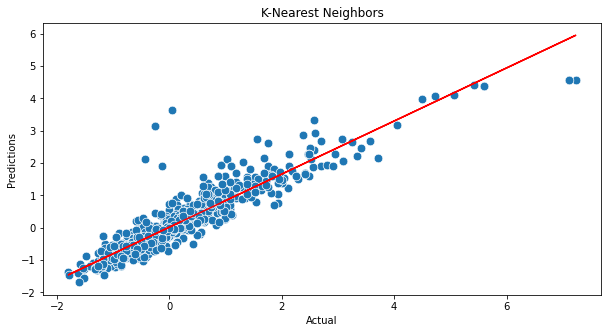

In [20]:
m, b = np.polyfit(y_test, pred_knn, 1)

plt.figure(figsize = (10,5))
sns.scatterplot(x=y_test, y=pred_knn, s=75)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("K-Nearest Neighbors")
plt.plot(y_test, m*y_test + b, color="red")
plt.show()

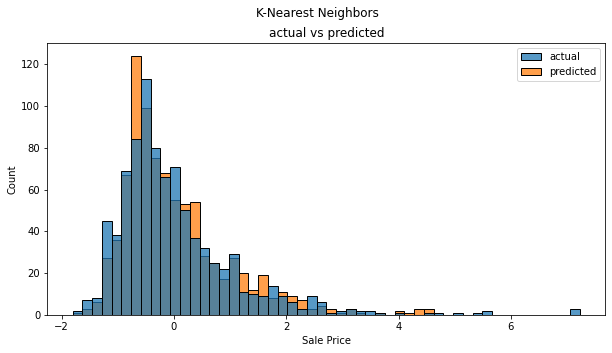

In [21]:
df_knn = pd.DataFrame({"actual":y_test, "predicted":pred_knn})

plt.figure(figsize = (10,5))
sns.histplot(df_knn)
plt.suptitle("K-Nearest Neighbors")
plt.title("actual vs predicted")
plt.xlabel("Sale Price")
plt.show()

In [22]:
explained_variance = metrics.explained_variance_score(y_test, pred_knn)
max_error = metrics.max_error(y_test, pred_knn)
mean_abs_error = metrics.mean_absolute_error(y_test, pred_knn)
mean_sq_error = metrics.mean_squared_error(y_test, pred_knn)
med_abs_error = metrics.median_absolute_error(y_test, pred_knn)
r2 = metrics.r2_score(y_test, pred_knn)

metrics_dict = {"metric":["explained_variance", "max_error", "mean_abs_error",
                          "mean_sq_error", "med_abs_error", "R2"],
                "score":["{:.3f}".format(explained_variance), "{:.3f}".format(max_error),
                         "{:.3f}".format(mean_abs_error), "{:.3f}".format(mean_sq_error),
                         "{:.3f}".format(med_abs_error), "{:.3f}".format(r2)]}

metrics_knn = pd.DataFrame(metrics_dict)

metrics_knn

,metric,score
0,explained_variance,0.843
1,max_error,3.604
2,mean_abs_error,0.268
3,mean_sq_error,0.190
4,med_abs_error,0.184
5,R2,0.843


### Ridge Regression Model

In [23]:
ridge = Ridge().fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

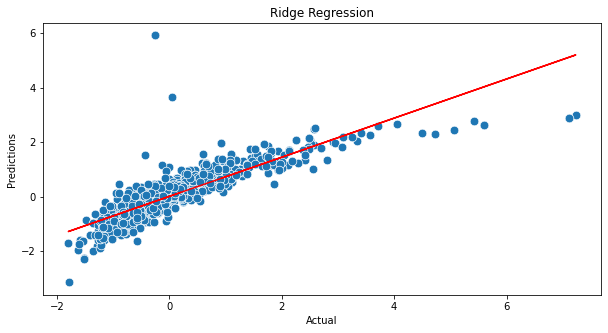

In [24]:
m, b = np.polyfit(y_test, pred_ridge, 1)

plt.figure(figsize = (10,5))
sns.scatterplot(x=y_test, y=pred_ridge, s=75)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Ridge Regression")
plt.plot(y_test, m*y_test + b, color="red")
plt.show()

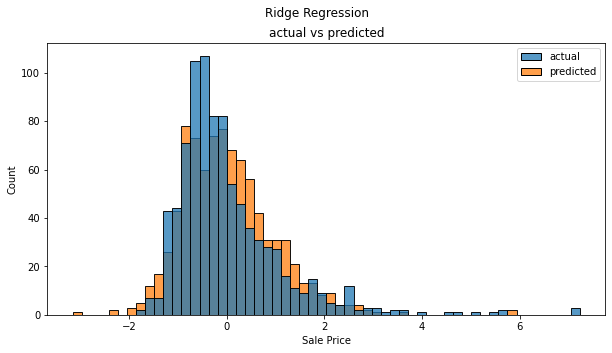

In [25]:
df_ridge = pd.DataFrame({"actual":y_test, "predicted":pred_ridge})

plt.figure(figsize = (10,5))
sns.histplot(df_ridge)
plt.suptitle("Ridge Regression")
plt.title("actual vs predicted")
plt.xlabel("Sale Price")
plt.show()

In [26]:
explained_variance = metrics.explained_variance_score(y_test, pred_ridge)
max_error = metrics.max_error(y_test, pred_ridge)
mean_abs_error = metrics.mean_absolute_error(y_test, pred_ridge)
mean_sq_error = metrics.mean_squared_error(y_test, pred_ridge)
med_abs_error = metrics.median_absolute_error(y_test, pred_ridge)
r2 = metrics.r2_score(y_test, pred_ridge)

metrics_dict = {"metric":["explained_variance", "max_error", "mean_abs_error",
                          "mean_sq_error", "med_abs_error", "R2"],
                "score":["{:.5f}".format(explained_variance), "{:.5f}".format(max_error),
                         "{:.5f}".format(mean_abs_error), "{:.5f}".format(mean_sq_error),
                         "{:.5f}".format(med_abs_error), "{:.5f}".format(r2)]}

metrics_ridge = pd.DataFrame(metrics_dict)

metrics_ridge

,metric,score
0,explained_variance,0.69227
1,max_error,6.18154
2,mean_abs_error,0.35123
3,mean_sq_error,0.37351
4,med_abs_error,0.23543
5,R2,0.69224


### Comparison

In [27]:
combined_metrics_df = pd.DataFrame({"Metric":metrics_knn["metric"],
                                    "Random Forest":metrics_rf["score"],
                                    "Decision Tree":metrics_tree["score"],
                                    "K-Nearest Neighbors":metrics_knn["score"],
                                    "Ridge Regression":metrics_ridge["score"]})

combined_metrics_df

,Metric,Random Forest,Decision Tree,K-Nearest Neighbors,Ridge Regression
0,explained_variance,0.906,0.79790,0.843,0.69227
1,max_error,3.450,7.49226,3.604,6.18154
2,mean_abs_error,0.162,0.13467,0.268,0.35123
3,mean_sq_error,0.115,0.24568,0.190,0.37351
4,med_abs_error,0.083,0.00000,0.184,0.23543
5,R2,0.905,0.79757,0.843,0.69224


### Conclusion

All four models represent linear models and overall, are decent models. From the metric table,
the<br>Random Forest model performs the best. The conclusion to our question is yes, the price of a house <br>
can be predicted by regression and the Random Forest model is the best model.